# **Loan Approval Prediction Analysis**

Chandana Anand Rangappa (862545654)

Ranjitha Narasimhamurthy (862548883)

Vismaya Anand Bolbandi ( 862548529)

# **INTRODUCTION**
# Problem Statement

Loan approval is a critical task for financial institutions, involving significant risk assessment. The process requires understanding various applicant characteristics, such as income, credit history, and employment status, to make fair and efficient decisions. However, manual evaluations are time-consuming and prone to inconsistencies.

The question this project addresses is:


"***Can we accurately predict loan approvals based on applicant characteristics and financial data?***"


This problem is relevant because automating loan approval decisions can:

1. Reduce operational costs.

2. Improve decision accuracy and consistency.

3. Minimize risks associated with lending to unqualified applicants.


Loan approvals depend on various factors like income, credit history, loan amount, and marital status. Understanding these factors through data analysis and machine learning can improve the efficiency and fairness of decision-making.

By leveraging machine learning, we aim to develop a predictive model that can support this decision-making process, ultimately benefiting both institutions and applicants.


# **DATASET**
**Why is This Dataset Relevant?**

Realistic Context: Reflects challenges financial institutions face in decision-making.

Mixed Data Types: Requires handling of both numerical and categorical data.

Predictive Potential: Enables the development of a robust predictive model.
## Features
### Categorical Features:
- **person_gender**: Gender of the applicant (e.g., Male, Female).
- **person_education**: Education level of the applicant (e.g., High School, Bachelor, Master).
- **person_home_ownership**: Indicates whether the applicant owns or rents a home.
- **loan_intent**: Purpose of the loan (e.g., Personal, Education, Medical).
- **previous_loan_defaults_on_file**: Indicates if the applicant has previous loan defaults (Yes/No).

### Numerical Features:
- **person_age**: Age of the applicant.
- **person_income**: Annual income of the applicant.
- **loan_amnt**: Loan amount requested.
- **loan_int_rate**: Interest rate associated with the loan.
- **loan_percent_income**: Loan amount as a percentage of income.
- **cb_person_cred_hist_length**: Length of the applicant’s credit history.
- **credit_score**: Applicant’s credit score.

### Target Variable:
- **loan_status**: Loan approval status (1: Approved, 0: Denied).




# **IMPORT LIBRARIES**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **LOAD AND EXPLORE DATASET**

In [32]:
# Load dataset
data = pd.read_csv('loan_data.csv')

# Display basic information about the dataset
print("Dataset Overview:")
print(data.info())
print(data.head())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_

# **ENCODE CATEGORICAL VARIABLES**

In [33]:
# Data Preprocessing
print("\nPreprocessing Data...")
# Encode categorical features
encoder = LabelEncoder()
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])


Preprocessing Data...


# **FEATURE ENGINEERING**

In [34]:
# Feature Scaling for numerical columns
scaler = StandardScaler()
numerical_columns = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


# **DATA PREPARATION**

In [35]:
# Define features and target
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **MODEL EVALUATION AND TRAINING**

In [36]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42)
}

results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': conf_matrix
    }

    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(conf_matrix)



Training Logistic Regression...
Accuracy: 0.8891851851851852
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     10493
           1       0.76      0.73      0.75      3007

    accuracy                           0.89     13500
   macro avg       0.84      0.83      0.84     13500
weighted avg       0.89      0.89      0.89     13500

Confusion Matrix:
[[9798  695]
 [ 801 2206]]

Training Random Forest...
Accuracy: 0.9246666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10493
           1       0.88      0.77      0.82      3007

    accuracy                           0.92     13500
   macro avg       0.91      0.87      0.89     13500
weighted avg       0.92      0.92      0.92     13500

Confusion Matrix:
[[10176   317]
 [  700  2307]]

Training SVC...
Accuracy: 0.9002222222222223
Classification Report:
              preci

# **VISUALIZATION**

**Loan Status Distribution**

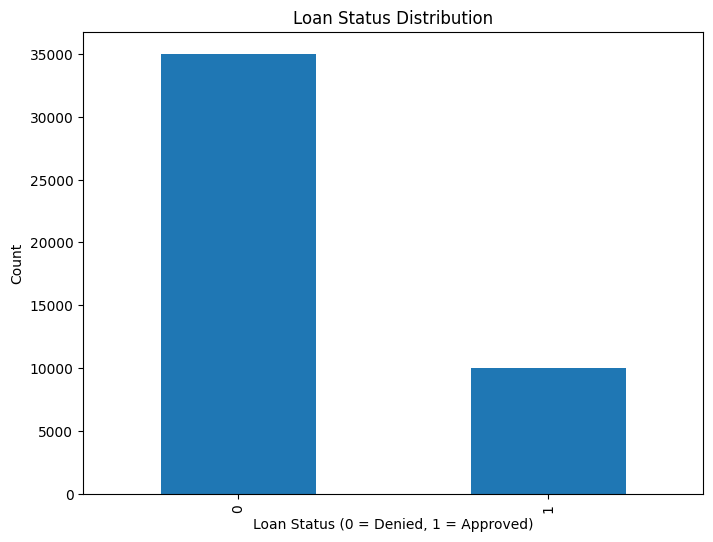

In [37]:
plt.figure(figsize=(8, 6))
data['loan_status'].value_counts().plot(kind='bar', title='Loan Status Distribution')
plt.xlabel('Loan Status (0 = Denied, 1 = Approved)')
plt.ylabel('Count')
plt.show()

**Applicant Income vs Loan Amount**

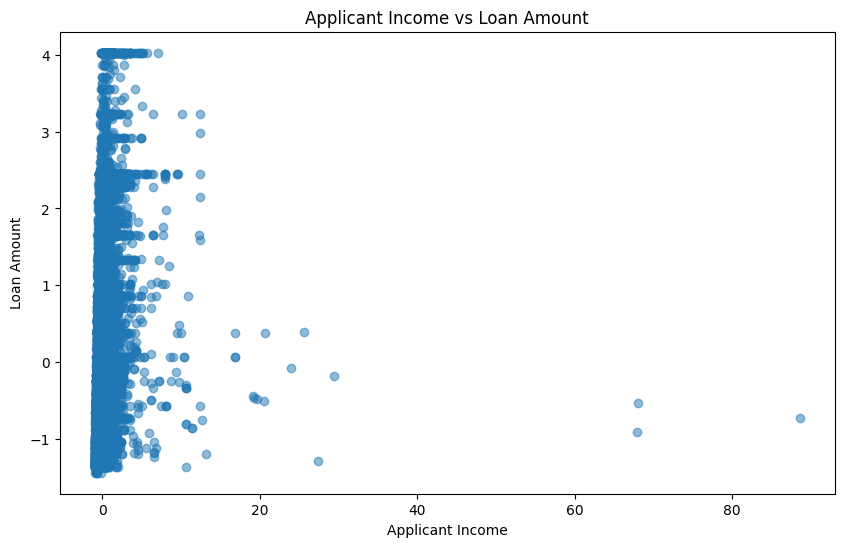

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(data['person_income'], data['loan_amnt'], alpha=0.5)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Applicant Income vs Loan Amount')
plt.show()


**DIstribution of Credit Scores by Loan Status**

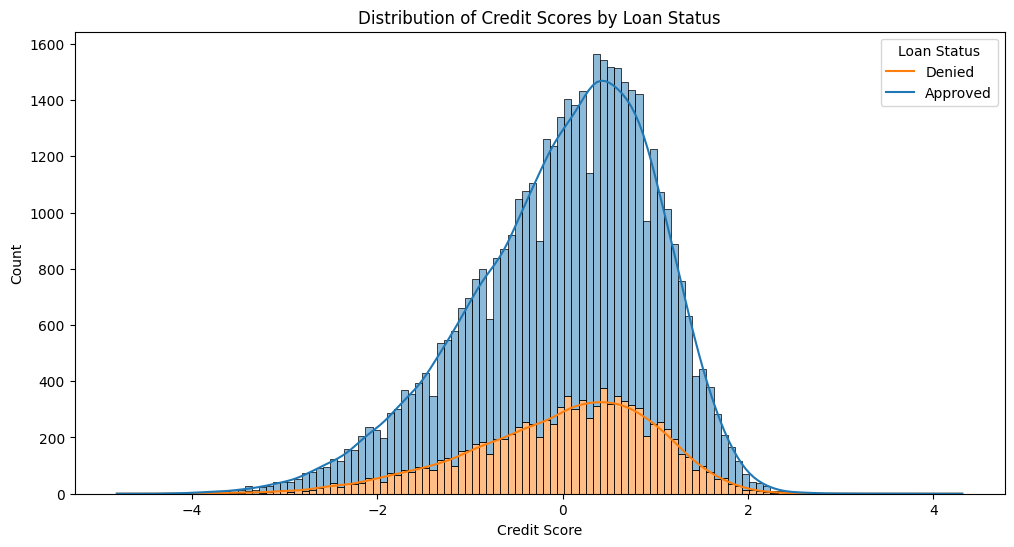

In [39]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='credit_score', hue='loan_status', kde=True, multiple="stack")
plt.title('Distribution of Credit Scores by Loan Status')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Denied', 'Approved'])
plt.show()

**Loan Distribution by Age**

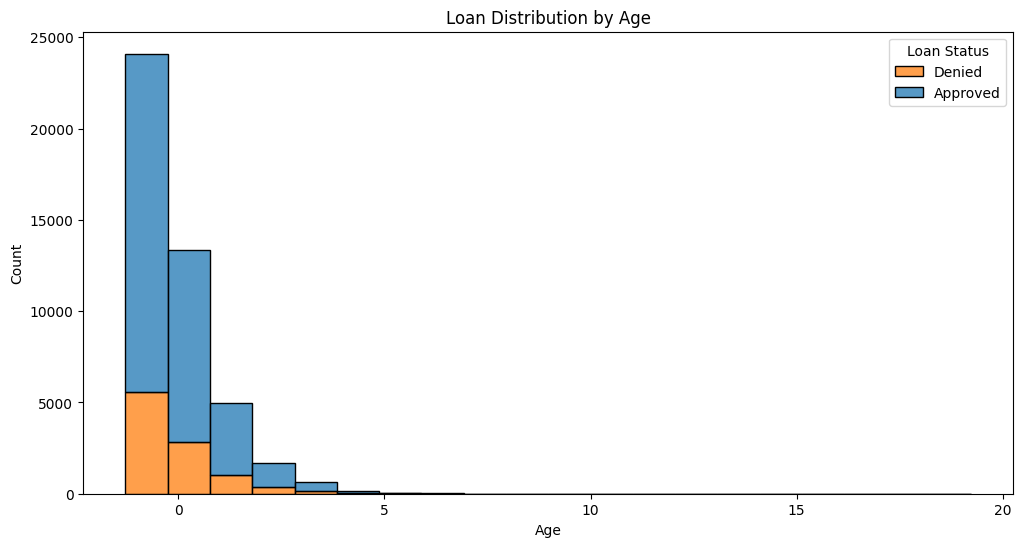

In [40]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='person_age', hue='loan_status', multiple='stack', bins=20)
plt.title('Loan Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Denied', 'Approved'])
plt.show()

**Annual Expenditure**

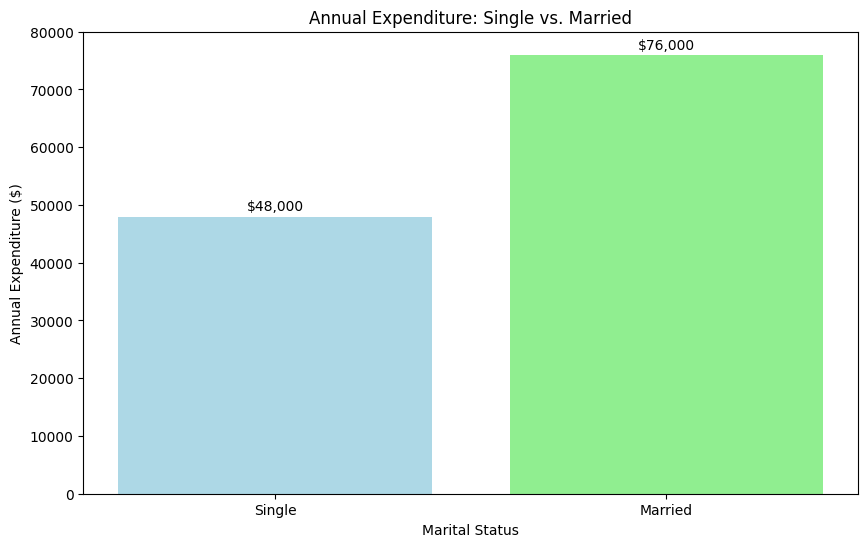

In [41]:
categories = ['Single', 'Married']
incomes = [48000, 76000]

plt.figure(figsize=(10, 6))
plt.bar(categories, incomes, color=['lightblue', 'lightgreen'])
plt.title('Annual Expenditure: Single vs. Married')
plt.xlabel('Marital Status')
plt.ylabel('Annual Expenditure ($)')
plt.ylim(0, 80000)

for i, v in enumerate(incomes):
    plt.text(i, v + 1000, f'${v:,}', ha='center')

plt.show()


**Loan Pool Diversification by Industry**

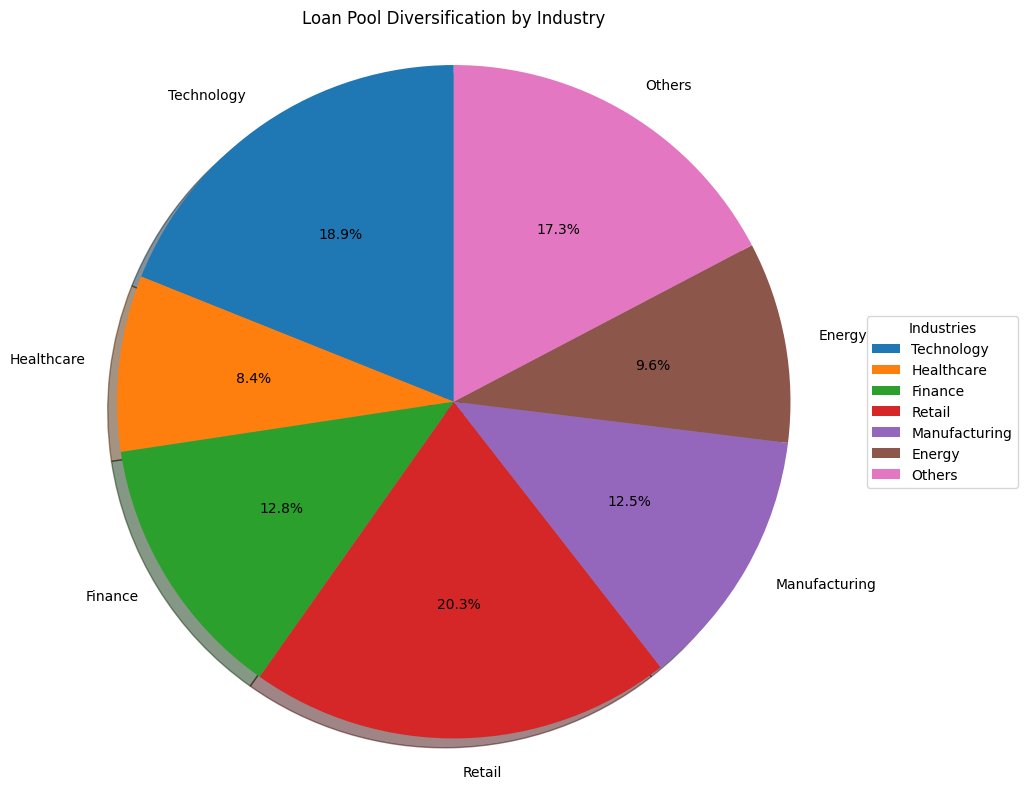

In [42]:
industries = ['Technology', 'Healthcare', 'Finance', 'Retail', 'Manufacturing', 'Energy', 'Others']
loan_amounts = np.random.randint(1000000, 10000000, size=len(industries))

plt.figure(figsize=(10, 8))
plt.pie(loan_amounts, labels=industries, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Loan Pool Diversification by Industry')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.legend(title="Industries", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()


**Loan Approval Rates by Credit Score Categories**

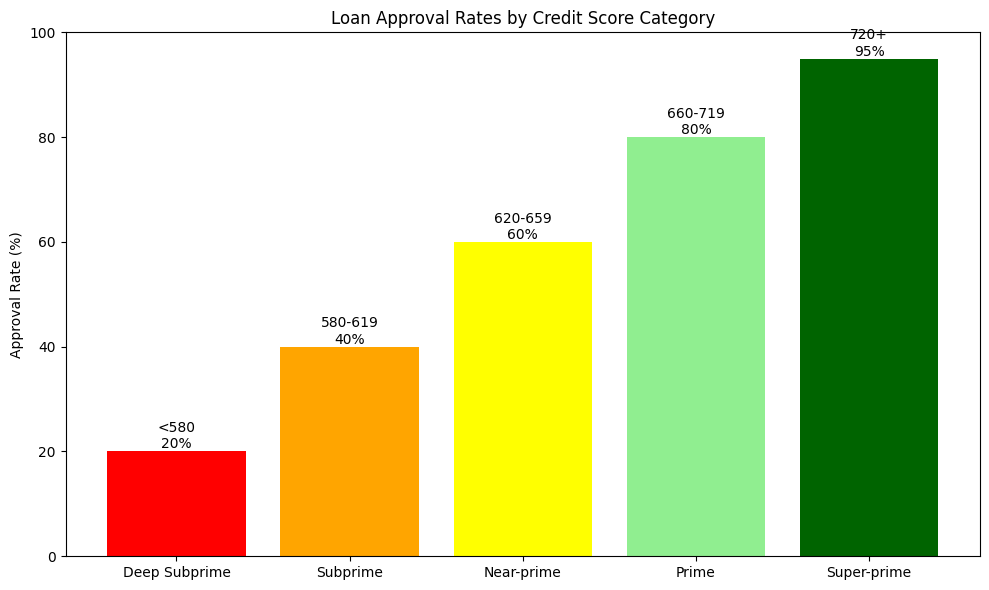

In [43]:
credit_categories = ['Deep Subprime', 'Subprime', 'Near-prime', 'Prime', 'Super-prime']
credit_scores = ['<580', '580-619', '620-659', '660-719', '720+']
approval_rates = [20, 40, 60, 80, 95]  # Estimated approval rates

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(credit_categories, approval_rates, color=['red', 'orange', 'yellow', 'lightgreen', 'darkgreen'])

ax.set_ylabel('Approval Rate (%)')
ax.set_title('Loan Approval Rates by Credit Score Category')
ax.set_ylim(0, 100)

for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height,
            f'{credit_scores[i]}\n{height}%',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()
